In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = np.loadtxt("machine-learning-ex2/ex2/ex2data1.txt", delimiter=",")
data[:5, ]

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ]])

In [4]:
X = np.c_[np.zeros(data.shape[0]), data[:,:2]]
y = data[:,2]
y.size

100

In [5]:
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(loc="best");

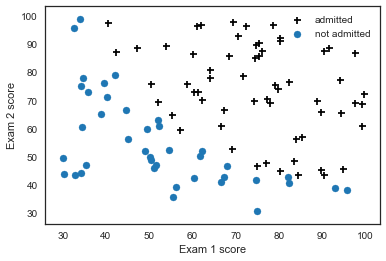

In [6]:
plot_data(data, "Exam 1 score", "Exam 2 score", "admitted", "not admitted")

In [7]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [8]:
sigmoid(0)

0.5

In [9]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1.0/m * (np.log(h).T.dot(y) + (np.log(1-h).T).dot(1-y))
    return J

In [10]:
cost_function([0,0,0], X,y)

0.69314718055994506

In [12]:
def gradient(theta, X, y, niter=1000):
    m = y.size
   
    h = sigmoid(X.dot(theta))
    gradient =  - (1.0/m)*X.T.dot(h-y).flatten()
    return gradient

In [13]:
theta = gradient(np.array([0,0,0]), X, y)
print theta

[ -0.          12.00921659  11.26284221]


### Predict

In [45]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p

In [47]:
(predict(theta, X) == y).sum()

60

### Plot Decision Boundary

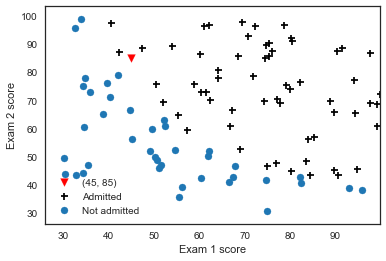

In [68]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h.T, [0.5], linewidths=1, colors='b');

### Regularized Logistic Regression

In [51]:
data2 = np.loadtxt('machine-learning-ex2/ex2/ex2data2.txt', delimiter=',')

In [53]:
y = np.c_[data2[:,2]]
X = data2[:,:2]

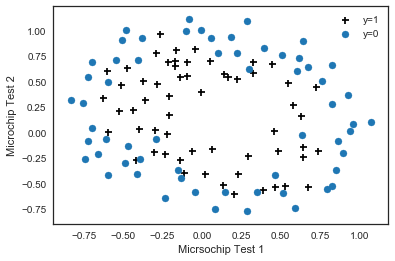

In [55]:
plot_data(data2, "Micrsochip Test 1", "Microchip Test 2", "y=1", "y=0", axes=None)

In [57]:
pf = PolynomialFeatures(6)
X_poly = pf.fit_transform(X)
X_poly.shape

(118, 28)

In [59]:
def regularized_compute_cost(theta, x, y, reg):
    m = y.size
    h = sigmoid(X.dot(thetha))
    J = -1.0/m * (np.log(h).T.dot(y) + (np.log(1-h).T).dot(1-y)) + reg/(2*m) * np.sum(np.square(theta[1:]))
    return J